D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE


In [3]:
#import SWAPLINEmain

import datetime
import seaborn as sns
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
#from numpy import in1d
%pylab inline
today=f"{datetime.datetime.now():%Y-%m-%d-%I:%M%p}"
today

Populating the interactive namespace from numpy and matplotlib


'2022-03-01-11:11AM'

In [18]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\Developmental_mouse brain

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\Developmental_mouse brain


In [19]:
dfposi=pd.read_table("20201111_MouseBrainAtlas_SL_metaInfo.tab",
                 index_col=0, header=0, sep="\t")

In [20]:
dfposi.head()

,Cluster,ClusterName,Region,PseudoAge,TSNE_X,TSNE_Y,UMAP_X,UMAP_Y,BTSNE_X,BTSNE_Y,UMAP3D_X,UMAP3D_Y,UMAP3D_Z
10X25_3_A_1:TTGGTACTGGGACAx,Neural_crest,634,Midbrain,9.505,-25.900671,-6.408116,6.208536,7.370287,-56.705326,-15.175609,2.873503,3.853158,-6.144522
10X27_3_A_1:TATCAGCTCTTGCCx,Neural_crest,634,Midbrain,9.540,-26.354128,-1.820086,5.459467,8.159930,-55.292125,-10.095811,1.731046,3.764495,-6.431027
10X27_3_A_1:AACCAGTGCTCAGAx,Neural_crest,634,Midbrain,9.930,-26.986095,-7.087025,6.572917,7.498238,-61.365980,-15.862534,3.126918,3.940230,-6.405674
10X27_3_A_1:CTAGTTTGCCTGAAx,Neural_crest,634,Midbrain,10.230,-27.583021,-6.904059,6.436008,7.521403,-62.872862,-14.369149,2.961187,4.019217,-6.277933
10X27_3_A_1:GTAGACTGGGATCTx,Neural_crest,634,Midbrain,10.635,-26.837190,-8.949903,6.671855,7.109936,-64.516093,-16.561974,3.474845,3.712845,-6.309426


In [21]:
dfpfcclus=dfposi.T.loc[["Cluster","TSNE_X","TSNE_Y"]]
dfpfcclus.shape

(3, 127326)

In [4]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\Developmental_mouse brain

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\Developmental_mouse brain


In [5]:
import loompy
ds=loompy.connect("20201111Final_normalized_MV_genes_MouseBrainAtlas.loom")

In [6]:
ds.shape

(1943, 127326)

In [7]:
ds.ra.keys()

['Gene']

In [8]:
ds.ra[ 'Gene']

array(['Spon2', 'Il1r1', 'Plp1', ..., 'Tubb3', 'Col1a2', 'Htr2c'],
      dtype=object)

In [9]:
ds.ca.keys()

['CellID']

In [10]:
ds.ca["CellID"]

array(['10X66_4_A_1:TATGTCTGGTAAAGx', '10X66_4_A_1:TGTAGTCTGGTTTGx',
       '10X66_4_A_1:TCCACGTGGAAACAx', ..., '10X70_6_A_1:GCACAATGGATGAAx',
       '10X70_3_A_1:CATCAGGAGTGAGGx', '10X70_6_A_1:ATTGGTCTAACCACx'],
      dtype=object)

In [11]:
df=pd.DataFrame(ds[:, :])

In [12]:
df.shape

(1943, 127326)

In [13]:
df.index=ds.ra[ 'Gene']
df.columns=ds.ca["CellID"]

In [14]:
df.shape

(1943, 127326)

In [15]:
df.tail()

,10X66_4_A_1:TATGTCTGGTAAAGx,10X66_4_A_1:TGTAGTCTGGTTTGx,10X66_4_A_1:TCCACGTGGAAACAx,10X66_4_A_1:ACGCCGGAGATGAAx,10X66_4_A_1:TAATCGCTTTTCACx,10X66_4_A_1:CTAACTACAGAGTAx,10X66_4_A_1:AAAGAGACACCATGx,10X66_4_A_1:CACAGATGCGTCTCx,10X66_4_A_1:ATACCTACTGGTGTx,10X17_2_A_1:GGCCACGATTGACGx,...,10X70_3_A_1:ACGATGACGTATGCx,10X70_6_A_1:AGGATGCTGCGAAGx,10X70_6_A_1:CATTGACTAGGCGAx,10X70_6_A_1:GGAGCCACGTCGTAx,10X70_3_A_1:TACACACTCGCAATx,10X70_3_A_1:TTACACACATCTTCx,10X70_3_A_1:GTCGAATGGGTGTTx,10X70_6_A_1:GCACAATGGATGAAx,10X70_3_A_1:CATCAGGAGTGAGGx,10X70_6_A_1:ATTGGTCTAACCACx
Lbp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.272478,0.243579,0.000000,0.253731,0.653233,0.406296,0.707016
Pmm1,0.693619,1.402414,2.648176,1.600961,2.246777,1.394,0.000000,1.251627,0.775450,0.551642,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tubb3,10.404279,61.706237,18.537234,16.009605,12.232450,11.849,13.612563,26.597082,21.195624,21.238227,...,0.789690,0.000000,0.000000,0.000000,0.243579,0.000000,1.014925,0.000000,0.000000,0.000000
Col1a2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.820845,0.272478,0.000000,0.000000,0.000000,0.000000,0.203148,0.000000
Htr2c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,11.450503,12.469201,1.026056,23.705629,13.883977,13.037785,20.298507,19.597001,3.453512,22.153170


set(df.loc["Cluster"])

df=df.T.loc[~df.loc["Cluster"].isin(['sensory'])].T
df.shape

In [22]:
dfpfcclus.head()

,10X25_3_A_1:TTGGTACTGGGACAx,10X27_3_A_1:TATCAGCTCTTGCCx,10X27_3_A_1:AACCAGTGCTCAGAx,10X27_3_A_1:CTAGTTTGCCTGAAx,10X27_3_A_1:GTAGACTGGGATCTx,10X27_3_A_1:TCATCAACAAAACGx,10X40_4_A_1:ATGGACACTCCAAGx,10X25_6_A_1:TATGTCACCTTGTTx,10X40_6_A_1:GTCCACTGGTCGTAx,10X25_3_A_1:GTCAATCTGTTCGAx,...,10X70_3_A_1:ACGATGACGTATGCx,10X70_6_A_1:AGGATGCTGCGAAGx,10X70_6_A_1:CATTGACTAGGCGAx,10X70_6_A_1:GGAGCCACGTCGTAx,10X70_3_A_1:TACACACTCGCAATx,10X70_3_A_1:TTACACACATCTTCx,10X70_3_A_1:GTCGAATGGGTGTTx,10X70_6_A_1:GCACAATGGATGAAx,10X70_3_A_1:CATCAGGAGTGAGGx,10X70_6_A_1:ATTGGTCTAACCACx
Cluster,Neural_crest,Neural_crest,Neural_crest,Neural_crest,Neural_crest,Neural_crest,Neural_crest,Neural_crest,Neural_crest,Neural_crest,...,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus
TSNE_X,-25.900671,-26.354128,-26.986095,-27.583021,-26.83719,-27.093393,-27.753744,-26.230066,-23.935976,-25.698044,...,-3.752286,-3.416189,-2.118943,-1.401663,-1.109969,-2.861044,-3.27632,-2.384009,-2.105404,-2.648681
TSNE_Y,-6.408116,-1.820086,-7.087025,-6.904059,-8.949903,-7.605725,-8.571558,-10.941864,-10.545198,-6.442016,...,7.113171,7.542386,7.489019,7.345128,7.512784,7.581213,7.561613,7.647335,7.286618,7.483227


In [23]:
df.shape

(1943, 127326)

In [24]:
dfpfcclus.shape

(3, 127326)

In [25]:
dfpfcclus=dfpfcclus.T.loc[df.columns].T
dfpfcclus.head()

,10X66_4_A_1:TATGTCTGGTAAAGx,10X66_4_A_1:TGTAGTCTGGTTTGx,10X66_4_A_1:TCCACGTGGAAACAx,10X66_4_A_1:ACGCCGGAGATGAAx,10X66_4_A_1:TAATCGCTTTTCACx,10X66_4_A_1:CTAACTACAGAGTAx,10X66_4_A_1:AAAGAGACACCATGx,10X66_4_A_1:CACAGATGCGTCTCx,10X66_4_A_1:ATACCTACTGGTGTx,10X17_2_A_1:GGCCACGATTGACGx,...,10X70_3_A_1:ACGATGACGTATGCx,10X70_6_A_1:AGGATGCTGCGAAGx,10X70_6_A_1:CATTGACTAGGCGAx,10X70_6_A_1:GGAGCCACGTCGTAx,10X70_3_A_1:TACACACTCGCAATx,10X70_3_A_1:TTACACACATCTTCx,10X70_3_A_1:GTCGAATGGGTGTTx,10X70_6_A_1:GCACAATGGATGAAx,10X70_3_A_1:CATCAGGAGTGAGGx,10X70_6_A_1:ATTGGTCTAACCACx
Cluster,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,...,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus,Choroid plexus
TSNE_X,14.16353,14.344239,13.894244,13.856288,13.865479,17.466282,14.06287,13.833599,13.877506,13.886925,...,-3.752286,-3.416189,-2.118943,-1.401663,-1.109969,-2.861044,-3.27632,-2.384009,-2.105404,-2.648681
TSNE_Y,3.717851,3.02054,3.471131,3.544421,3.582295,-6.061431,2.974258,3.495583,3.475301,3.23149,...,7.113171,7.542386,7.489019,7.345128,7.512784,7.581213,7.561613,7.647335,7.286618,7.483227


In [34]:
df.index

Index(['Spon2', 'Il1r1', 'Plp1', 'Neurod6', 'Dda1', 'Ocln', 'Capn5', 'Hesx1',
       'Nrn1', 'Trp53i11',
       ...
       'Chrd', 'Cldn3', 'Lmcd1', 'Nrxn1', 'Tbx18', 'Lbp', 'Pmm1', 'Tubb3',
       'Col1a2', 'Htr2c'],
      dtype='object', length=1943)

In [35]:
dfpfc=df.astype(float)

In [28]:
cd D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE


In [29]:
import prefiltering

In [36]:
path="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/"
dictfilename1="Homologene_mouse2human_dict2.pickle"
dfpfc=prefiltering.TransSpeciesGeneName(dfm=dfpfc, dictfilename=dictfilename1, path=path)
samegene=set(dfpfc.index)
len(samegene)

1943

path='D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/'
filename='PANTHER_cell_cycle_genes.txt'
#dfpfc2= prefilteringTest.prefilter(df_f=dfpfc,filename=filename, path=path)
dfpfc= prefiltering.prefilter(df_f=dfpfc,filename=filename, path=path)
dfpfc.shape

commongene=list(dfpfc.index)
len(commongene)

#import prefilteringTest0
#sw=SWprefiltering.SWAPLINE(dfpfc)
mu, cv, sigma, score, mu_linspace, cv_fit, params, mu_sorted, cv_sorted, thrs, MVlist=prefiltering.MVgenes(dfpfc)
#mu, cv, sigma, score, mu_linspace, cv_fit, params, mu_sorted, cv_sorted, thrs, MVlist=MVgenes(dfpfc)

thrs

import SWvisPlot

df_dev = dfpfc.loc[MVlist]
df_dev.shape

In [37]:
set(dfpfcclus.loc['Cluster'])

{'Choroid plexus',
 'Ectoderm',
 'Glia',
 'Neural_crest',
 'Neural_tube',
 'Neuron',
 'OPCs',
 'Pericyte/SMC',
 'Rgl',
 'VLMC'}

In [38]:
proto = pd.Series({'Choroid plexus':'Choroid plexus',
 'Early Neural Tube': 'Neural_tube',
                    'Neural_tube': 'Neural_tube',
                   'Neural Tube': 'NT',
 'Ectoderm':'Ectoderm',
 'Fibroblast':'VLMC',
                   'VLMC':'VLMC',
                    'NT/Rgl': 'NT/Rgl',
 'Glia': 'Glia',
 'Neural crest': 'Neural_crest',
                    'Neural_crest': 'Neural_crest',
 'Neuron':'Neuron',
 'OPCs': 'OPCs',
 'Radial glia':  'Rgl',
                   'Rgl':'Rgl',
 'Vascular':'Pericyte/SMC',
                   'PeriV_Mural':'Pericyte/SMC',
                   'Pericyte/SMC':'Pericyte/SMC',
       })
mct_dev = dfpfcclus.loc['Cluster'].values
mprotogruop = proto.loc[mct_dev].values
len(mprotogruop)

127326

In [39]:
dfpfcclus.loc['Cluster']=mprotogruop

In [40]:
set(dfpfcclus.loc['Cluster'])

{'Choroid plexus',
 'Ectoderm',
 'Glia',
 'Neural_crest',
 'Neural_tube',
 'Neuron',
 'OPCs',
 'Pericyte/SMC',
 'Rgl',
 'VLMC'}

#import prefilteringTest12
#sw=SWprefiltering.SWAPLINE(dfpfc)
list_genes,df_fold=prefiltering.enrichmentscoreBETA(dfpfcclus=dfpfcclus,df_dev=df_dev, shortcut=True)

len(set(list_genes))

In [42]:
mdf_train_set, mclasses_names, mtrain_index, sharedMVgenes =prefiltering.MVgene_Scaling(list_genes=dfpfc.index.tolist(),dfpfc=dfpfc,score=0,
                                                                   thrs=1000, TPTT=0,     dfpfcclus=dfpfcclus,mprotogruop=mprotogruop,commongene=dfpfc.index.tolist(),
                                                                                              sharedMVgenes=None,std_scaling=True,
    tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="train")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:301: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:302: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.astype(float).dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:304: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = scalepfc.dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:305: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfpfc_dev = scalepfc.loc[set(scalepfc.index) & set(sharedMVgenes)].dropna()


In [43]:
mdf_train_set.shape

(1942, 127326)

# Skorch_NN

In [44]:
import torch
from torch import nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
torch.set_default_tensor_type('torch.DoubleTensor')
torch.manual_seed(0);
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [45]:
from skorch.callbacks import Callback
# CPU default.  if cuda, tensor to be applied,
class Classifier3Layers(nn.Module):
    def __init__(
            self,
            input_dim=mdf_train_set.shape[0],
            hidden_dim=int(mdf_train_set.shape[0]/5),
            output_dim=len(unique(mtrain_index)),
            dropout=0.3,
    ):
        super(Classifier3Layers, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X
        
def NNclassifer(mdf_train_set=mdf_train_set,mtrain_index=mtrain_index,epochNum=100,learningRate=0.05,verbose=0,optimizerMmentum=0.8,
    dropout=0.3):
    #nist_d=mdf_train_set.shape[0],
    #hidden_d = int(mnist_d / 5),
    #output_d = len(unique(mtrain_index))):
    #from skorch import NeuralNetClassifier
    #import Classifier3Layers
    #import LossTweet
    net=NeuralNetClassifier(
        Classifier3Layers,
        max_epochs=epochNum,
        lr=learningRate,
        verbose=0,
        optimizer__momentum=optimizerMmentum,
        module__dropout=dropout,
        optimizer__nesterov = True,
    #callbacks=[acTweet(max_loss=0.2)]
    )

    normalizer = 0.9*mdf_train_set.values.max(1)[:,newaxis]
    net .fit((mdf_train_set.values / normalizer).T, mtrain_index)
    #noticeMSG
    return net



In [51]:
net=NNclassifer(
    mdf_train_set=mdf_train_set,
    mtrain_index=mtrain_index,
    epochNum=100,
    learningRate=0.0025,
    verbose=0,
    optimizerMmentum=0.85,
    dropout=0.5,
    #device='cuda',
    #imizer__nesterov=True,
    )

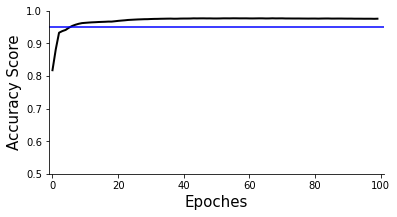

In [52]:
import SWvisPlot
ax=SWvisPlot.AccuracyPlot( acc=net.history[:,'valid_acc'] ,accCutoff=0.95,
                 Xlow=-1, Xhigh=len(net.history[:,'valid_acc'])+1,Ylow=0.5, Yhigh=1,
               )

##  epochNum as 25

In [54]:
net=NNclassifer(
mdf_train_set=mdf_train_set,
    mtrain_index=mtrain_index,
    epochNum=25,
    learningRate=0.0025,
    verbose=0,
    optimizerMmentum=0.85,
    dropout=0.5,

 )

In [56]:
set(dfpfcclus.loc["Cluster"].values)

{'Choroid plexus',
 'Ectoderm',
 'Glia',
 'Neural_crest',
 'Neural_tube',
 'Neuron',
 'OPCs',
 'Pericyte/SMC',
 'Rgl',
 'VLMC'}

In [57]:
mwanted_order =[
'Choroid plexus',
     'Pericyte/SMC',
     'VLMC',
     'Neural_crest',
 'Ectoderm',
 

 'Neural_tube',
 'Rgl',
'Glia',  'OPCs','Neuron',

 ]

In [58]:
refcolor_dict =pd.Series({'Astro':( 123,104,238),  'VLMC':  (5, 75,5), 'Ectoderm': (108,49,13)  , 'Neuron':(0,191,255) ,
                          'Glia':   (128,0,128) ,
             'OPCs':    (255,215,0), 'Pericyte/SMC': (0, 215,   7)  , 'Rgl':    (255,0,0),
             'Choroid plexus':  (70, 70, 70),  'SMC': ( 80, 235, 255),'aaSMC':(139,69,19),
             'NC_auto':(10, 120, 190), 'Neural Tube':(230, 10, 100),'Neural_crest':  (128,128,0),
             'Meni_FB':   (190,  10,  10),'Meni_Neuron': (225, 160,  30),
                       'Meni_Rgl':    ( 159,155,110),
           'NC_Mes': (69,155,110)  ,'migratory 1': (215, 105,  30) , 'NC_Migr':  (190, 200, 190),'Neural_tube':   ( 255,20,147),
                         'qRgl':  (  10, 10, 250),'qNSC2': (215, 105,  30),'NC_sensory':  (79,47,79)   ,
              'NT/Rgl':    (170, 180, 170),})

In [59]:
mclasses_names[mtrain_index]

array(['Neuron', 'Neuron', 'Neuron', ..., 'Choroid plexus',
       'Choroid plexus', 'Choroid plexus'], dtype=object)

In [60]:
import SWAPLINEmain

In [61]:

mreordername, dfprobRef,refcolor_dict,refdataLR, mreorder_idx =SWAPLINEmain.prediction(
    mwanted_order = mwanted_order, mclasses_names = mclasses_names, mprotogruop = dfpfcclus.loc["Cluster"].values,
     mtrain_index = mtrain_index, net = net, mreorder_ix = None, mdf_train_set = mdf_train_set,   
    learninggroup="train", mcolor_dict=refcolor_dict)
#RadarVisualization

In [63]:
todaytime=f"{datetime.datetime.now():%Y%m%d%I%M%p}"
dfprobRef.to_csv("probability_table%s.tab"%todaytime,sep="\t")
dfclRef.to_csv("Location_table%s.tab"%todaytime,sep="\t")


In [83]:
#import SWAPLINEmain9
dftest0,ratiodf=SWAPLINEmain.permutationTest(mdf_train_set=mdf_train_set,net=net, dfprobRef=dfprobRef,mreorder_ix=mreorder_idx,num=10)
#RadarVisualization

## TCGA GBM CELL

In [64]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM\GSE168004_OSM_celllines_tpm.csv

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM\GSE168004_OSM_celllines_tpm.csv


In [65]:
dfgbm=pd.read_table("GSE168004_OSM_celllines_tpm.csv",index_col=0,header=0,sep=",")

In [66]:

dfgbm.shape

(33538, 2767)

In [67]:
dfgbm.head()

,AAACGCTGTTTACACG-1,AAACGCTTCCTACACC-1,AAAGAACAGTTTGTCG-1,AAAGAACGTCAAGCCC-1,AAAGGATGTGTCCAAT-1,AAAGGGCAGAATCGTA-1,AAAGTCCAGCCATTCA-1,AAAGTGACATTGCTGA-1,AAAGTGATCGTGTGAT-1,AACAACCTCTGGAGAG-1,...,TTTAGTCTCGCACGGT-1,TTTATGCCACCCTAGG-1,TTTCACAAGGTCGACA-1,TTTCAGTCAGAGATGC-1,TTTCATGCAGCTGTCG-1,TTTCATGCATGCCGAC-1,TTTGGAGAGCAAGCCA-1,TTTGGAGAGCGAACTG-1,TTTGGAGGTAGCTGTT-1,TTTGTTGGTTGCCATA-1
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM


In [69]:
dfgbmclus=pd.read_table("GSE168004_OSM_celllines_readme.csv",index_col=0,header=0,sep=",")

In [70]:
dfgbmclus.tail()

,title,source name,organism
Sample name,,,
TTTCATGCATGCCGAC-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens
TTTGGAGAGCAAGCCA-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens
TTTGGAGAGCGAACTG-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens
TTTGGAGGTAGCTGTT-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens
TTTGTTGGTTGCCATA-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens


In [71]:
dfgbmclus.columns=['Cluster', 'source name', 'organism']

In [72]:
dfgbm2=dfgbm.T.join(dfgbmclus.iloc[:,:1],how="inner").T

In [73]:
set(dfgbm2.loc["Cluster"])

{'MGG23_BSA', 'MGG23_OSM', 'MGG75_BSA', 'MGG75_OSM'}

In [74]:
dfclus=dfgbm2.iloc[-1:,:]
dfgbm=dfgbm2.iloc[:-1,:].astype(float)

In [75]:
dfclus.head()

,AAACGCTGTTTACACG-1,AAACGCTTCCTACACC-1,AAAGAACAGTTTGTCG-1,AAAGAACGTCAAGCCC-1,AAAGGATGTGTCCAAT-1,AAAGGGCAGAATCGTA-1,AAAGTCCAGCCATTCA-1,AAAGTGACATTGCTGA-1,AAAGTGATCGTGTGAT-1,AACAACCTCTGGAGAG-1,...,TTTAGTCTCGCACGGT-1,TTTATGCCACCCTAGG-1,TTTCACAAGGTCGACA-1,TTTCAGTCAGAGATGC-1,TTTCATGCAGCTGTCG-1,TTTCATGCATGCCGAC-1,TTTGGAGAGCAAGCCA-1,TTTGGAGAGCGAACTG-1,TTTGGAGGTAGCTGTT-1,TTTGTTGGTTGCCATA-1
Cluster,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,...,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM


In [76]:
dfgbm.head()

,AAACGCTGTTTACACG-1,AAACGCTTCCTACACC-1,AAAGAACAGTTTGTCG-1,AAAGAACGTCAAGCCC-1,AAAGGATGTGTCCAAT-1,AAAGGGCAGAATCGTA-1,AAAGTCCAGCCATTCA-1,AAAGTGACATTGCTGA-1,AAAGTGATCGTGTGAT-1,AACAACCTCTGGAGAG-1,...,TTTAGTCTCGCACGGT-1,TTTATGCCACCCTAGG-1,TTTCACAAGGTCGACA-1,TTTCAGTCAGAGATGC-1,TTTCATGCAGCTGTCG-1,TTTCATGCATGCCGAC-1,TTTGGAGAGCAAGCCA-1,TTTGGAGAGCGAACTG-1,TTTGGAGGTAGCTGTT-1,TTTGTTGGTTGCCATA-1
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
dfgbm.shape

(33538, 2767)

In [80]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm,dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=dfpfc.mean(1),
                   sharedMVgenes=mdf_train_set.index.tolist(), score=0, commongene=mdf_train_set.index.tolist(), thrs=0,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:322: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


In [81]:
df_train_setclpn.shape

(1942, 2767)

In [82]:
protogruop

array(['MGG23_BSA', 'MGG23_BSA', 'MGG23_BSA', ..., 'MGG75_OSM',
       'MGG75_OSM', 'MGG75_OSM'], dtype=object)

In [83]:
wanted_orderclpn =['MGG23_BSA', 'MGG23_OSM', 'MGG75_BSA', 'MGG75_OSM']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
reorder_ixclpn = [list(wanted_orderclpn).index(i) for i in wanted_orderclpn]
color_dictclpn = pd.Series({'Classical':  (100, 100, 240),'Mesenchymal':   ( 95, 186,  70),
              'MGG75_OSM':  (55, 120, 55), 'MGG75_BSA': ( 180, 35, 155), 'MGG23_OSM':  (250, 125,  85),
              'MGG23_BSA':    (190, 200, 190)})

In [84]:
#import SWAPLINEmain10
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
##RadarVisualization

## PE_GBM CELL

In [127]:
dfgbm = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/GBMprim_UMI_WithCluster_New.tab", index_col =0 ,header=0, sep="\t")
dfgbm.shape

<ipython-input-127-dfe870e7b549>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

(20129, 4073)

In [128]:
dfgbm.head()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
dfgbm.tail()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
CDY1-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPRY3-loc2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
VAMP7-loc1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,1,0,0
IL9R-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cluster,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,...,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09


In [130]:
dfgbm=dfgbm.T.loc[dfgbm.loc["Cluster"]!='CD45+']
dfgbm.shape

(4044, 20129)

In [131]:
dfgbm=dfgbm.T
set(dfgbm.loc["Cluster"])

{'CL1_KI09',
 'CL2_KI12',
 'CL3_KI07',
 'CL4_KI12',
 'CL5_KI01',
 'CL6_KI03.07',
 'CL7_KI06',
 'CL8_KI16',
 'MS1_KI24',
 'MS2_KI09',
 'MS3',
 'MS4_KI09',
 'MS5',
 'MS6_KI17.05',
 'MS7_KI09',
 'MS8_KI16',
 'NL1_KI15.12',
 'PN1_KI15.12.08.01',
 'PN2_KI15'}

In [132]:
dfclus=dfgbm.iloc[-1:,:]
dfgbm=dfgbm.iloc[:-1,:]

In [133]:
dfclus.head()

,KI009-1772-122-307-C01,KI009-1772-122-307-E01,KI009-1772-122-307-F01,KI009-1772-122-307-C02,KI009-1772-122-307-F02,KI009-1772-122-307-B03,KI009-1772-122-307-C03,KI009-1772-122-307-G04,KI009-1772-122-307-C06,KI009-1772-122-307-C07,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
Cluster,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,...,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09


In [134]:
dfgbm.head()

,KI009-1772-122-307-C01,KI009-1772-122-307-E01,KI009-1772-122-307-F01,KI009-1772-122-307-C02,KI009-1772-122-307-F02,KI009-1772-122-307-B03,KI009-1772-122-307-C03,KI009-1772-122-307-G04,KI009-1772-122-307-C06,KI009-1772-122-307-C07,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [142]:
#import prefilteringTest26
score=0
thrs=0
commongene=mdf_train_set.index.tolist()
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=10000,
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:322: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


In [143]:
df_train_setclpn.shape

(1942, 4044)

In [144]:
protogruop

array(['CL1_KI09', 'CL1_KI09', 'CL1_KI09', ..., 'MS7_KI09', 'MS7_KI09',
       'MS7_KI09'], dtype=object)

In [145]:
wanted_orderclpn =['CL1_KI09',
 'CL2_KI12',
 'CL3_KI07',
 'CL4_KI12',
 'CL5_KI01',
 'CL6_KI03.07',
 'CL7_KI06',
 'CL8_KI16',
 'MS1_KI24',
 'MS2_KI09',
 'MS3',
 'MS4_KI09',
 'MS5',
 'MS6_KI17.05',
 'MS7_KI09',
 'MS8_KI16',
 'NL1_KI15.12',
 'PN1_KI15.12.08.01',
 'PN2_KI15']
color_dictclpn=pd.Series({'CL1_KI09':  ( 10, 10, 250),'CL2_KI12': (215, 105,  30),'CL3_KI07':   (117, 245, 7) ,
              'PN1_KI15.12.08.01':    (111,111,111),'CL5_KI01': (79,47,79)  ,'PN2_KI15':    (180, 140, 130),
              'CL4_KI12':  (100, 180, 240),'MS8_KI16': ( 80, 235, 255),'CL6_KI03.07':(139,69,19),
              'CL7_KI06':(10, 120, 190),'CL8_KI16':(230, 10, 100),'NL1_KI15.12':  (120, 15,215),
            'MS1_KI24':   (190,  10,  10),'MS2_KI09': (225, 160,  30),'MS3':   (217, 245,   7) ,
            'MS4_KI09': (69,155,110)  ,'MS5':  (100, 100, 240),'MS6_KI17.05':  (190, 200, 190),'MS7_KI09':   ( 50, 180, 180),
                     })

In [146]:
#import SWAPLINEmain10
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization

# Suva2019_GBM

In [148]:
dfsample = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/2019Suva/IDHwtGBM.processed.SS2.logTPM.txt/IDHwtGBM.processed.SS2.logTPM.txt", index_col =0 ,header=0, sep="\t")
dfsample.shape


(23686, 7930)

In [149]:
dfsampleclus = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/2019Suva/IDHwtGBM.Metadata.SS2.txt", index_col =0 ,header=0, sep="\t")
dfsampleclus.shape


(7931, 13)

In [150]:
dfsampleclus.head()

,Sample,GBM_Type,Cell_Type,Cross_Section,Genes_Expressed,AC-like,MES1-like,MES2-like,NPC1-like,NPC2-like,OPC-like,G1S,G2M
NAME,,,,,,,,,,,,,
TYPE,group,group,group,group,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
MGH100-P5-A01,MGH100,Adult,Malignant,NaN,7403,2.29724756105443,0.311211961707847,-0.293633485956514,-0.516822723797423,-0.801937232473608,0.417244989115182,-0.951816425952768,-0.310899447575504
MGH100-P5-A03,MGH100,Adult,Malignant,NaN,8861,-0.559428510000344,-1.20298531371585,-0.579529857513807,0.893472111534824,-0.149805199002272,0.896569778332911,3.62443186028081,1.47087171714853
MGH100-P5-A04,MGH100,Adult,Malignant,NaN,5957,-1.08740329652001,-0.0734224534184421,2.25051898663126,-1.65942656638598,-0.860216154455462,-1.42107814485363,-0.346711265261959,-0.303424805657141
MGH100-P5-A06,MGH100,Adult,Malignant,NaN,7320,-0.646200158140011,-0.541540113216199,-0.482611877864668,0.564371473329837,-0.043081960262292,0.53108354241134,3.02202290807356,0.821238632091698


In [151]:
set(dfsampleclus["Cell_Type"])

{'Macrophage', 'Malignant', 'Oligodendrocyte', 'T-cell', 'group'}

In [152]:
dfsampleclus=dfsampleclus.loc[dfsampleclus["Cell_Type"].isin(['Malignant'])]
dfsampleclus.shape

(6863, 13)

In [153]:
dfsample=dfsample[dfsampleclus.index].dropna()
dfsample.shape

(23686, 6863)

In [154]:
dfsample.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,1.409798,0.436162,0.00000,0.0,0.000000,0.508936,0.889084,2.948414,1.025029,1.393416,...,0.0000,0.0,0.0000,1.6955,0.0,0.000000,0.00000,2.0841,0.0000,0.0000
A1BG-AS1,0.000000,2.499272,3.74771,0.0,3.229742,1.969749,0.000000,0.000000,2.650535,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,3.283000,0.00000,0.0000,0.0000,3.6513
A1CF,0.000000,0.000000,0.00000,0.0,0.000000,0.108357,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,0.071763,0.00000,0.0000,0.0000,0.0000
A2M,2.850199,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.468844,0.000000,...,2.7793,0.0,4.0601,1.4082,0.0,7.084700,5.51510,5.0966,2.2975,5.5945
A2M-AS1,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,0.552870,0.49978,0.0000,0.0000,0.0000


In [155]:
Patientlist=[]
for item in dfsample.columns:
    temp=item.split("-")[0]
    if temp[:3]=="MGH":
        temp=temp[:6]
    Patientlist.append(temp)
len(Patientlist)

6863

In [156]:
set(Patientlist)

{'BT1160',
 'BT1187',
 'BT749',
 'BT771',
 'BT786',
 'BT830',
 'BT920',
 'MGH100',
 'MGH101',
 'MGH102',
 'MGH104',
 'MGH105',
 'MGH106',
 'MGH110',
 'MGH113',
 'MGH115',
 'MGH121',
 'MGH122',
 'MGH124',
 'MGH125',
 'MGH128',
 'MGH129',
 'MGH136',
 'MGH143',
 'MGH151',
 'MGH152',
 'MGH66',
 'MGH85'}

In [157]:
dfsample.loc["PaitentID"]=Patientlist

In [158]:
dfsampleclus=dfsample.iloc[-2:,:]
dfsampleclus.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
ZZZ3,0.0,0.0,0.0,0.0,2.908621,2.428946,0.0,0.0,3.181262,0.0,...,4.8348,0.0,0.0,0.0,0.0,2.5852,0.0,0.0,0.0,0.0
PaitentID,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,...,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920


In [159]:
dfsample=dfsample.iloc[:-1,:]
dfsample.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,1.409798,0.436162,0.0,0.0,0.0,0.508936,0.889084,2.948414,1.025029,1.393416,...,0.0,0.0,0.0,1.6955,0.0,0.0,0.0,2.0841,0.0,0.0
A1BG-AS1,0.0,2.499272,3.74771,0.0,3.229742,1.969749,0.0,0.0,2.650535,0.0,...,0.0,0.0,0.0,0.0,0.0,3.283,0.0,0.0,0.0,3.6513
A1CF,0.0,0.0,0.0,0.0,0.0,0.108357,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.071763,0.0,0.0,0.0,0.0
A2M,2.850199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.468844,0.0,...,2.7793,0.0,4.0601,1.4082,0.0,7.0847,5.5151,5.0966,2.2975,5.5945
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.55287,0.49978,0.0,0.0,0.0


In [161]:
#FILTERING Mgl
dfgbm.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A07,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-B02,MGH100-P5-B09,MGH100-P5-C04,MGH100-P5-C06,...,BT920-P4-G07,BT920-P4-G08,BT920-P4-G09,BT920-P4-G10,BT920-P4-H02,BT920-P4-H03,BT920-P4-H05,BT920-P4-H08,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,1.409798,0.436162,0.00000,0.000000,0.889084,2.948414,1.393416,0.0,0.335712,0.000000,...,0.0000,0.0000,1.5084,0.85758,0.0,0.0000,0.0,0.000000,0.0000,0.0000
A1BG-AS1,0.000000,2.499272,3.74771,3.229742,0.000000,0.000000,0.000000,0.0,1.211635,2.398077,...,0.0000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,3.283000,0.0000,3.6513
A1CF,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.071763,0.0000,0.0000
A2M,2.850199,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.079335,...,3.1778,2.8065,4.3127,3.17220,0.0,4.0601,0.0,7.084700,2.2975,5.5945
A2M-AS1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.552870,0.0000,0.0000


In [162]:
dfclus=dfsampleclus
dfclus.index=["Unknown","Cluster"]
dfclus

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
Unknown,0.0,0.0,0.0,0.0,2.908621,2.428946,0.0,0.0,3.181262,0.0,...,4.8348,0.0,0.0,0.0,0.0,2.5852,0.0,0.0,0.0,0.0
Cluster,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,...,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920


In [163]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=dfpfc.mean(1),
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:322: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


In [164]:
wanted_orderclpn =['BT1160',
 'BT1187',
 'BT749',
 'BT771',
 'BT786',
 'BT830',
 'BT920',
 'MGH100',
 'MGH101',
 'MGH102',
 'MGH104',
 'MGH105',
 'MGH106',
 'MGH110',
 'MGH113',
 'MGH115',
 'MGH121',
 'MGH122',
 'MGH124',
 'MGH125',
 'MGH128',
 'MGH129',
 'MGH136',
 'MGH143',
 'MGH151',
 'MGH152',
 'MGH66',
 'MGH85']

color_dictclpn = pd.Series({'BT1160':  ( 50, 180, 180),'BT1187': (225, 160,  30),'BT749':    (217, 245,   7),
             'BT771':    (70, 80, 10), 'BT786':   (130, 140, 140),'BT830':    (80, 140, 130),
             'BT920':  (100, 100, 240),'MGH100': ( 80, 35, 255),'MGH101':(190, 235, 255),
              'MGH102':(210, 255, 215),'MGH104':(230, 140, 120),'MGH105':  (190,  10,  10),
                           
                           'MGH106':  ( 50, 80, 180), 'MGH110': (25, 160,  30),'MGH113':    (27, 245,   7),
            'MGH115':    (170, 80, 10), 'MGH121':   (130, 140, 140), 'MGH122':    (80, 140, 30),
              'MGH124':  (100, 10, 240),'MGH125': ( 180, 35, 255),'MGH128':(190, 235, 55),
              'MGH129':(210, 55, 215),'MGH136':(20, 140, 120),'MGH143':  (190,  210,  10),
                    'MGH151':  ( 30, 80, 80), 'MGH152': (25, 60,  30),'MGH66':    (27, 245,  207),
            'MGH85':    (70, 80, 210),      
                           
                           })

In [165]:
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
##RadarVisualization

## Couturier2020_DevGBM

In [167]:
import loompy

In [168]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_Couturier2020_DevGBM

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_Couturier2020_DevGBM


In [169]:
ds=loompy.connect("20210809FinalMatrixWithCluster.loom")

In [170]:
dfgbm=pd.DataFrame(ds[:,:])

In [171]:
dfgbm.index=ds.ra["Gene"]
dfgbm.columns=ds.ca['CellID']
dfgbm.loc["PatientID"]=ds.ca['PatientID']
dfgbm.loc["Cluster"]=ds.ca['Cluster']

In [172]:
dfclus=dfgbm.iloc[-2:,:]
dfgbm=dfgbm.iloc[:-2,:].astype(float)

In [181]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=10000,
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:322: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


In [182]:
wanted_orderclpn =['Astro', 'Mesenchymal', 'Neuronal', 'Oligo', 'Progenitor', 'Unassigned']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
#reorder_ixclpn = [list(classes_namesclpn).index(i) for i in wanted_orderclpn]
color_dictclpn = pd.Series({'Astro':  (100, 100, 240), 'Neuronal':   ( 0, 86,  255),
              'Mesenchymal':  (55, 120, 55), 'Oligo': ( 255,185, 5), 'Unassigned':  (192,192,192),
             'Progenitor':    (190, 0, 0)})

In [183]:
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization